In [1]:
############################################################
## Title  : 'Regression Analysis'                         ##
## Author : 'Sathish Kabatkar Ravindranth'                ##
## Date   : '27th January, 2023'                          ##
## Output : pdf document                                  ##
## Group  : 5                                             ##
############################################################

In [20]:
library(ggplot2)
library(GGally)
library(ggpubr)
library(dplyr)
library(olsrr)
library(tidyr)

In [3]:
#Loading the Input data
input_data <- read.csv('bodymeasurements.csv')

In [4]:
#Remove the variable ID
input_data  <- input_data  %>% dplyr::select(-ID)

In [5]:
#View the input data
head(input_data)

,Age,Sex,Height,Chest,Belly,Thigh,Knee,Calf,Ankle,Biceps,Wrist,Weight
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21,m,174.0,89.5,71.5,51.5,34.5,36.5,23.5,32.5,16.5,65.6
2,23,m,175.3,97.0,79.0,51.5,36.5,37.5,24.5,34.4,17.0,71.8
3,28,m,193.5,97.5,83.2,57.3,37.0,37.3,21.9,33.4,16.9,80.7
4,23,m,186.5,97.0,77.8,53.0,37.0,34.8,23.0,31.0,16.6,72.6
5,22,m,187.2,97.5,80.0,55.4,37.7,38.6,24.4,32.0,18.0,78.8
6,21,m,181.5,99.9,82.5,57.5,36.6,36.1,23.5,33.0,16.9,74.8


In [6]:
#Summarise all continous variables
standard_deviations <- rbind.data.frame(lapply(input_data  %>% dplyr::select(-Sex),sd))
summary_table  <- rbind.data.frame(lapply(input_data  %>% dplyr::select(-Sex),summary))
summary_table  <-  rbind(summary_table, standard_deviations)
row.names(summary_table) <- c("Min", "Q1", "Median", "Mean", "Q3", "Max", "SD")
summary_table  <- t(round(summary_table,3))
summary_table

,Min,Q1,Median,Mean,Q3,Max,SD
Age,18.0,22.000,25.00,26.896,31.250,40.0,5.849
Height,147.2,163.200,170.20,170.880,177.800,198.1,9.398
Chest,72.6,84.775,90.95,92.221,99.825,116.7,9.600
Belly,57.9,67.500,74.10,75.283,82.000,113.2,9.904
Thigh,46.3,53.700,56.30,56.822,59.500,75.7,4.431
Knee,29.0,34.300,35.90,36.005,37.700,45.7,2.544
Calf,28.4,34.000,35.80,35.880,37.700,45.0,2.756
Ankle,16.4,20.900,21.90,22.025,23.100,29.3,1.847
Biceps,22.4,27.275,30.35,30.828,34.125,42.4,4.267
Wrist,13.0,14.875,15.90,15.967,17.000,19.6,1.351


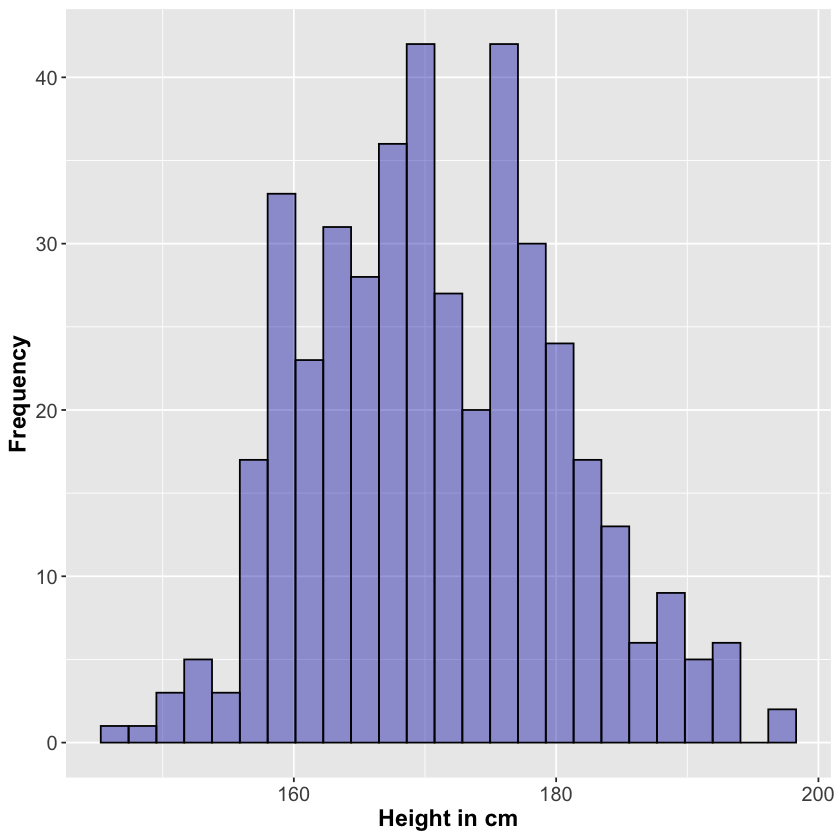

In [7]:
#Histogram to see the frequency distribution of the variable Height 
ggplot(input_data, aes(x=Height))+ 
  geom_histogram(color="black", fill="#0002AF", alpha = 0.4, bins = 25)+
  xlab("Height in cm") + ylab("Frequency") +
  theme(axis.text=element_text(size=12), axis.title=element_text(size=14 , face = "bold"))

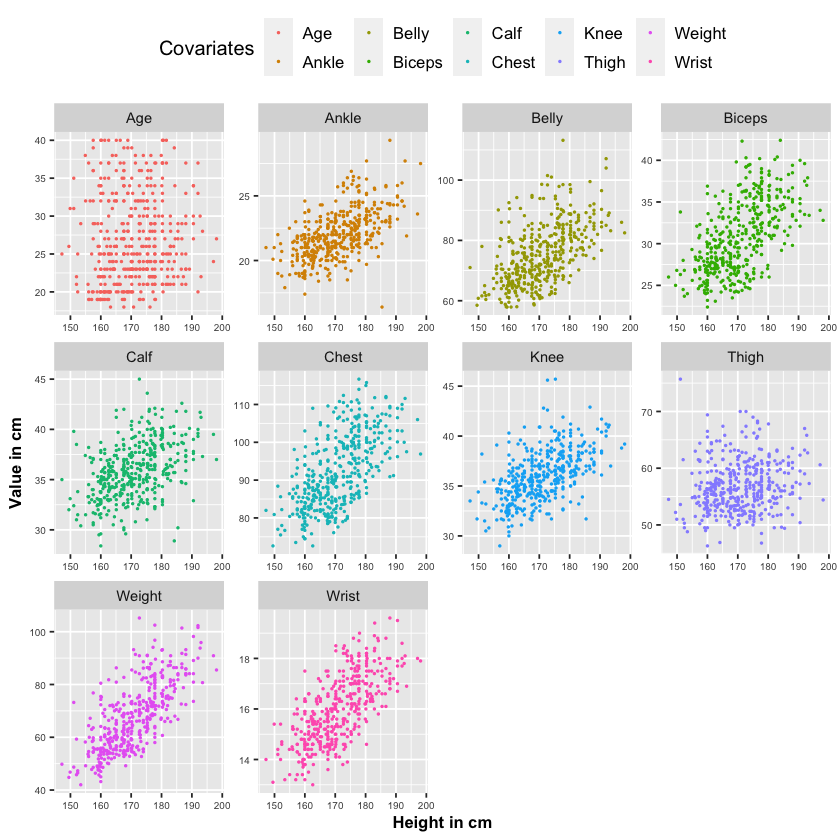

In [8]:
#Correlation scatter plot for height vs all variables
input_corr <- input_data  %>% dplyr::select(-Sex) %>% 
              tidyr::gather(key = "Covariates", value = "value",-Height)

corr_plot  <- ggplot(input_corr, aes(x = Height, y = value, col = Covariates)) +
  geom_point(size = 0.3) +
      facet_wrap(~Covariates, scales = "free") + 
      xlab("Height in cm") + ylab("Value in cm")  + 
      theme(axis.text=element_text(size=6), 
            axis.title=element_text(size=10 , face = "bold"),
            legend.title = element_text(size=12),
            legend.text = element_text(size=10),
            legend.position = "top",
            legend.direction = "horizontal"
           )
corr_plot

In [9]:
#Linear regression model
full_model  <-  lm(Height ~ ., data = input_data)
summary(full_model)


Call:
lm(formula = Height ~ ., data = input_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9956  -2.5388   0.1734   2.7092  14.0613 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 211.23128    6.96030  30.348  < 2e-16 ***
Age           0.01769    0.03802   0.465   0.6420    
Sexm          6.38037    0.98056   6.507 2.23e-10 ***
Chest        -0.14534    0.06964  -2.087   0.0375 *  
Belly        -0.67402    0.05946 -11.335  < 2e-16 ***
Thigh        -0.58815    0.10001  -5.881 8.45e-09 ***
Knee          0.09616    0.17084   0.563   0.5738    
Calf         -0.67324    0.14570  -4.621 5.12e-06 ***
Ankle         0.10198    0.20798   0.490   0.6242    
Biceps       -1.01355    0.15004  -6.755 4.88e-11 ***
Wrist         0.52087    0.39333   1.324   0.1861    
Weight        1.40384    0.06858  20.469  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.249 on 412 degrees of freedom
Mul

In [10]:
#Finding the best subsets using least squares estimator
best_subsets  <- ols_step_best_subset(full_model)

In [11]:
#Listing the best subsets
best_subsets  <- best_subsets  %>% mutate(Model = mindex, Number_of_covariates = n,
                         Covariates = predictors, Rsquared = rsquare, Adj.Rsquared = adjr,
                         AIC = aic, BIC = sbc)  %>% 
                  select(Model, Covariates, Adj.Rsquared, AIC, BIC)                  
best_subsets

,Model,Covariates,Adj.Rsquared,AIC,BIC
,<int>,<chr>,<dbl>,<dbl>,<dbl>
11,1,Weight,0.5272616,2789.499,2801.648
51,2,Thigh Weight,0.6630077,2646.977,2663.176
181,3,Belly Thigh Weight,0.7422729,2534.269,2554.518
505,4,Belly Thigh Biceps Weight,0.7652275,2495.706,2520.004
841,5,Sex Belly Thigh Biceps Weight,0.7860804,2457.254,2485.602
1360,6,Sex Belly Thigh Calf Biceps Weight,0.7940634,2442.113,2474.511
1710,7,Sex Chest Belly Thigh Calf Biceps Weight,0.7956268,2439.864,2476.311
1949,8,Sex Chest Belly Thigh Calf Biceps Wrist Weight,0.7965996,2438.820,2479.317
2029,9,Sex Chest Belly Thigh Knee Calf Biceps Wrist Weight,0.7963231,2440.373,2484.920


In [12]:
#best_subset using AIC
best_subsets  %>% filter(AIC == min(best_subsets$AIC))

Model,Covariates,Adj.Rsquared,AIC,BIC
<int>,<chr>,<dbl>,<dbl>,<dbl>
8,Sex Chest Belly Thigh Calf Biceps Wrist Weight,0.7965996,2438.82,2479.317


In [13]:
#best_subset using BIC
best_subsets  %>% filter(BIC == min(best_subsets$BIC))

Model,Covariates,Adj.Rsquared,AIC,BIC
<int>,<chr>,<dbl>,<dbl>,<dbl>
6,Sex Belly Thigh Calf Biceps Weight,0.7940634,2442.113,2474.511


In [14]:
# Fitting the model, based on the based subset selection using BIC
best_subset_model  <- lm(Height ~ Sex + Belly + Thigh + Calf + Biceps + Weight, data = input_data)
summary(best_subset_model)


Call:
lm(formula = Height ~ Sex + Belly + Thigh + Calf + Biceps + Weight, 
    data = input_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0336  -2.5824   0.1241   2.6957  14.0164 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 213.72083    4.33769  49.271  < 2e-16 ***
Sexm          6.60926    0.94766   6.974 1.21e-11 ***
Belly        -0.72749    0.05296 -13.737  < 2e-16 ***
Thigh        -0.59827    0.09257  -6.463 2.87e-10 ***
Calf         -0.52786    0.12726  -4.148 4.07e-05 ***
Biceps       -1.10825    0.11774  -9.413  < 2e-16 ***
Weight        1.41574    0.05788  24.461  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.265 on 417 degrees of freedom
Multiple R-squared:  0.797,	Adjusted R-squared:  0.7941 
F-statistic: 272.8 on 6 and 417 DF,  p-value: < 2.2e-16


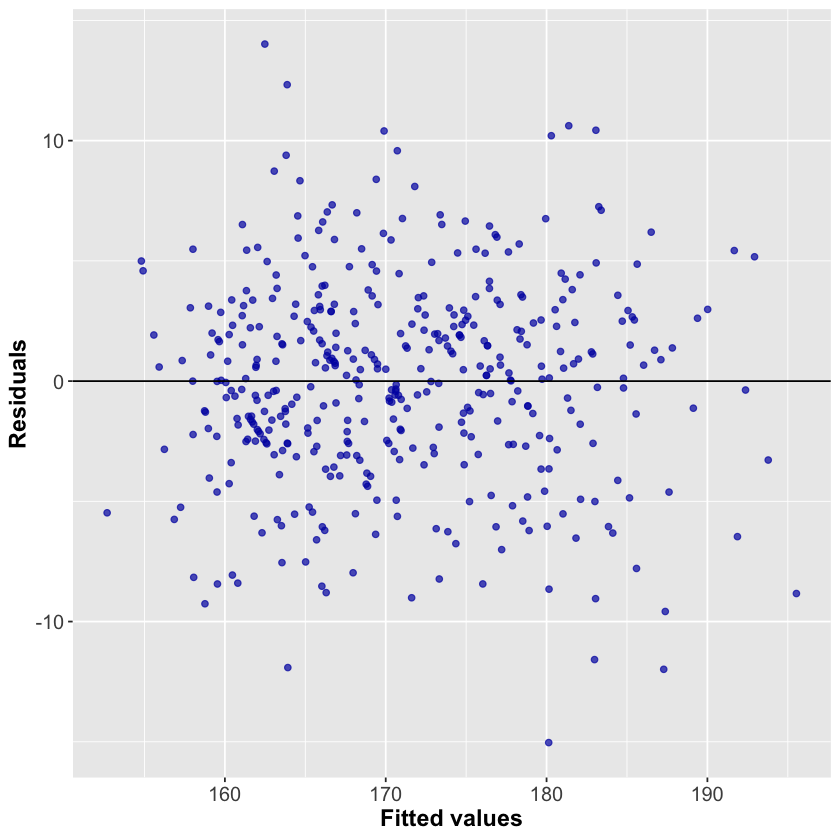

In [15]:
#Residual plot for standardized residuals vs Fitted best subset model
ggplot(best_subset_model, aes(x = .fitted, y = best_subset_model$residuals)) +
  geom_point(size = 1.5, color = "#0002AF", alpha = 0.7) +
  geom_hline(yintercept = mean(best_subset_model$residuals), color = "black", linewidth = 0.5) + xlab("Fitted values") + ylab("Residuals") +
      theme(axis.text=element_text(size=12), axis.title=element_text(size=14 , face = "bold"))

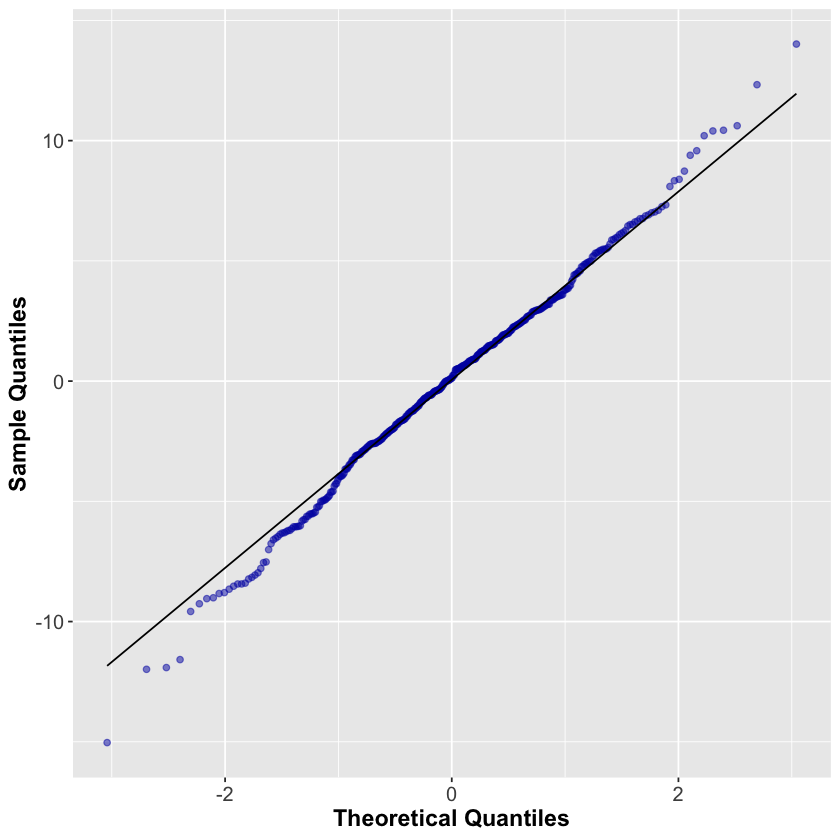

In [16]:
# QQ plot for the standardized residuals
ggplot(input_data, aes(sample = best_subset_model$residuals)) +
       stat_qq(distribution = stats::qnorm, color = "#0002AF", alpha = 0.5) +
       stat_qq_line() + 
       xlab("Theoretical Quantiles") + 
       ylab("Sample Quantiles") + 
          theme(plot.title = element_text(face = "bold",hjust = 0.5, size = 12), 
                axis.text=element_text(size=12),
                axis.title=element_text(size=14, face = "bold"), 
                legend.text = element_text(size = 12))

In [17]:
#Extracting the coefficient values and p-values
coefficient_values  <- t(rbind(round(best_subset_model$coefficients,3)))
p_values  <- t(rbind(round(summary(best_subset_model)$coefficients[ , 4],10)))

In [18]:
#Finding the confidence intervals for the estimated coefficients
conf_intervals  <- as.data.frame(round(confint(best_subset_model, level = 0.95),3))
colnames(conf_intervals)  <- c("lower","upper")
conf_intervals['Confidence_interval']  <- paste0("[",conf_intervals$lower," , ", conf_intervals$upper, "]")
conf_intervals  <- conf_intervals  %>% select(Confidence_interval)

In [19]:
#Displaying the output
parameters  <- cbind(coefficient_values, conf_intervals, p_values)
colnames(parameters)  <- c("Estimated coefficients", "Confidence intervals", "P_values")
parameters

,Estimated coefficients,Confidence intervals,P_values
,<dbl>,<chr>,<dbl>
(Intercept),213.721,"[205.194 , 222.247]",0.00000e+00
Sexm,6.609,"[4.746 , 8.472]",0.00000e+00
Belly,-0.727,"[-0.832 , -0.623]",0.00000e+00
Thigh,-0.598,"[-0.78 , -0.416]",3.00000e-10
Calf,-0.528,"[-0.778 , -0.278]",4.07118e-05
Biceps,-1.108,"[-1.34 , -0.877]",0.00000e+00
Weight,1.416,"[1.302 , 1.53]",0.00000e+00
